# Mentale Gesundheit: Eine Reise durch die Psyche

## Eine Reise durch die Psyche: Wie Daten uns helfen können, mentale Gesundheit zu verstehen

## Einleitung:
Depressionen, Angstzustände und Stress sind in unserer modernen Gesellschaft allgegenwärtig und betreffen Menschen jeden Alters, Geschlechts und Hintergrunds. Obwohl es viele Ressourcen gibt, die versuchen, das Bewusstsein für diese Themen zu schärfen, bleibt ihre Ursache größtenteils unbekannt. Eine Möglichkeit, mehr über diese Phänomene zu erfahren, besteht darin, die Daten der Depression Anxiety Stress Scales (DASS) zu nutzen, die zwischen 2017 und 2019 gesammelt wurden. Die DASS-Umfrage ist ein standardisierter Fragebogen, der darauf abzielt, Depressionen, Angstzustände und Stress bei Befragten zu messen. Entwickelt wurde der psychometrische Fragebogen von Dr. Peter Lovibond und Dr. Stephen Lovibond und besteht aus 42 Fragen, die jeweils von 1 bis 4 skaliert sind. Die Bewertungsmöglichkeiten sind unten abgebildet und bilden ab, ob die Frage sehr stark auf die befragte Person zutrifft (4 Apply to me very much, or most of the time) oder gar keine Übereinstimmung it der Frage vorhanden ist (1 Did not apply to me at all)

![DASS-Skala](db/demo1.png)


## Ziel des Notebooks:
Analyse der DASS-Umfrageergebnisse und Untersuchung potenzieller Faktoren, die mit Depressionen, Angstzuständen und Stress assoziiert sind. Besonders im Vordergrund stehen Vorurteile, die es gegenüber Depressionen und ähnlichen Krankheiten gibt in Hinblick auf das Geschlecht und die Herkunft. . Ist es tatsächlich so, dass Frauen eher an einer Depression leiden? Trifft Menschen mit einem akademischen Abschluss eine Depression seltener, weil er wahrscheinlich ein höheres Gehalt verspricht oder ist das nur Schein? Gibt es einen Zusammenhang zwischen Depressionen und Herkunft? Auf diese und ähnliche Fragen wird in der Analyse eingegangen.

## Methodik:

Wie bereits unter dem Punkt Einleitung angemerkt, wurden die Daten wurden durch eine Online-Version der DASS-Umfrage von 2017 bis 2019 gesammelt. Dadurch ist ein aussagekräftiges Ergebnis von fast 40.000 Daten entstanden. Ebenfalls schon erwähnt wurde die Skalierung durch die DASS-Umfrage, wodurch eine Bewertung der Ergebnisse ermöglicht wird. Insgesamt standen 42 Fragen zur Verfügung, die durch die Bewertung beantwortet werden mussten.  Allerdings wurden nicht nur die Antworten gespeichert, sondern auch einerseits die Geschwindigkeit, in der diese beantwortet wurden und andererseits die Stelle, an der sie gefragt wurden, weil jeder Befragte eine zufällige Anordnung der Fragen erhalten hat. Darauffolgend wurde der TEN-ITEM PERSONALITY INVENTORY-(TIPI) durchgeführt, welcher Persönlichkeitseigenschaften analysiert. Bei dieser Umfrage stehen 10 Charaktereigenschaften zur Verfügung, die erneut skaliert und beantwortet werden müssen, wobei es hier 7 Bewertungsmöglichkeiten gibt.

![TIPI](db/TIPI.png)

Zuguterletzt wurden die Stammdaten der Teilnehmer befragt, welche Daten, wie Geschlecht, Alter, Herkunft enthalten.

![Stammdaten](db/Stammdaten.png)

Die Umfrage war für jeden offen, und die Teilnehmer waren motiviert, sie auszufüllen, um personalisierte Ergebnisse zu erhalten.
Die Daten, die in dieser Analyse verwendet wurden, wurden von Personen gesammelt, die einer Forschungsumfrage zugestimmt und ihre Daten für Forschungszwecke zur Verfügung gestellt haben.
Die Analyse wird basierend auf den Antworten zu jeder Frage sowie den demografischen und technischen Informationen durchgeführt, die von den Teilnehmern bereitgestellt wurden. Insgesamt hat es

Durch die Analyse der Daten der DASS-Umfrage hoffen wir, Einblicke in die Faktoren zu gewinnen, die mit Depressionen, Angstzuständen und Stress assoziiert sind. Diese Erkenntnisse könnten dazu beitragen, Präventions- und Behandlungsansätze zu entwickeln, um das Leben von Menschen, die von diesen Zuständen betroffen sind, zu verbessern. Idealerweise kann dadurch eine Entstigmatisierung von psychischen Krankheiten erreicht werden.

## Architektur

### Setup

![Architektur](db/Projekt-Architektur.png)

Für das Projekt werden auf den lokalen Rechnern Conda für die Python-Execution, DataSpell als IDE und je nach Projektmitglied teilweise MongoDB Compass oder DataGrip als GUI verwendet, um einen einfacheren Einblick zum Datenbank-Server zu erhalten. Die Datenbank selbst ist eine MongoDB Instanz, welche am FHTW-Server gehostet wird. Dadurch sind die Daten zentral für alle Teammitglieder zugänglich. Zusätzlich gibt es auf GitHub ein Repository, welches alle wichtigen Files sowie dieses Notebook selbst beinhaltet, um allen Mitgliedern des Teams die simultane Bearbeitung zu ermöglichen.

### Komponente und Versionen

- Conda: 22.9
- Python: 3.9
- Pymongo: 4.3.3
- Pandas: 1.4.4

### Import von Packages

In [50]:
try:
    import pymongo as mdb
    import csv
    import pandas as pd
    import matplotlib
    from matplotlib import pyplot as plt

except ImportError:
    !pip3 install pymongo
    !pip3 install python-csv
    !pip3 install pandas
    !pip3 install matplotlib
    import pymongo as mdb
    import csv
    import pandas as pd
    import matplotlib
    from matplotlib import pyplot as plt

### Die Verbindung zum MongoDB-Server wird eingerichtet

In [ ]:
try:
    client = mdb.MongoClient("mongodb://pt-n20.p4001.w3.cs.technikum-wien.at:4001")

    db = client.mental_health_db
    collection = db.survey

    if 'mental_health_db' in client.list_database_names():
        print('Connected to database')
    if 'survey' in db.list_collection_names():
        print('Connected to collection')
except mdb.errors.ConnectionFailure as e:
    print(e)

### CSV-Datensatz hochladen

Die Daten wurden mithilfe des Codes den man darunter sieht auf den Server hochgeladen. Es wurde auskommentiert, damit dies nicht unabsichtlich wieder ausgeführt werden kann.

In [ ]:
'''data = pd.read_csv('db/data.csv', delimiter='\t')
keys = data.columns.tolist()
data_dict = data.to_dict('records')
for item in data_dict:
    record = {}
    for key in keys:
        record[key] = item[key]
    collection.insert_one(record)'''

### Daten vom Server abfragen und in Pandas Dataframe speichern

In [10]:
cursor = collection.find({})
data = pd.DataFrame(list(cursor))
data = data.drop('_id', axis=1)
client.close()

In [11]:
print(data)

       Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  screensize  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...           1   
1        4    2   8118    1   36  2890    2   35   4777    3  ...           2   
2        3    7   5784    1   33  4373    4   41   3242    1  ...           2   
3        2   23   5081    3   11  6837    2   37   5521    1  ...           2   
4        2   36   3215    2   13  7731    3    5   4156    4  ...           2   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...           2   
39771    3   14   4792    4   41  2604    3   15   2668    4  ...           1   
39772    2    1  25147    1    4  4555    2   14   3388    1  ...           2   
39773    3   36   4286    1   34  2736    2   10   5968    2  ...           2   
39774    2   28  32251    1   22  3317    2    4  11734    1  ...           1   

       uniquenetworklocatio

In [223]:
voted = data['voted']
unique_values_voted = list(set(voted))
print(unique_values_voted)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 24, 26, 133, 54, 62, 65, 99]


In [224]:
value_counts_voted =voted.value_counts()

In [225]:
for value, count in value_counts_voted.items():
    print(f'{value}: {count}')

3: 9206
2: 9018
4: 7539
5: 4830
1: 2946
6: 2450
7: 1243
0: 1125
8: 676
9: 331
10: 195
11: 109
12: 56
13: 19
14: 8
15: 6
16: 5
17: 3
24: 1
23: 1
21: 1
19: 1
62: 1
26: 1
65: 1
54: 1
99: 1
133: 1


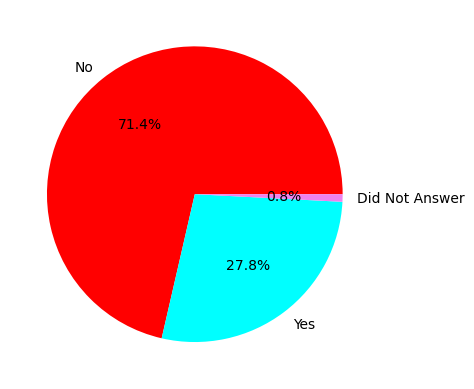

In [194]:
voted = data['voted']

#NaN = 0
#data_filtered = data[data['voted'] != NaN]
#voted = data_filtered['voted']

value_counts_voted = voted.value_counts()
plt.pie(value_counts_voted, labels=['No','Yes','Did Not Answer'], autopct='%1.1f%%',colors=['red','cyan','violet'])
plt.show()

In [185]:
married = data['married']
unique_values_married = list(set(married))
print(unique_values_married)


[0, 1, 2, 3]


In [127]:
value_counts_married = married.value_counts()

In [128]:
for value, count in value_counts_married.items():
    print(f'{value} : {count}')

1 : 34131
2 : 4357
3 : 1092
0 : 195


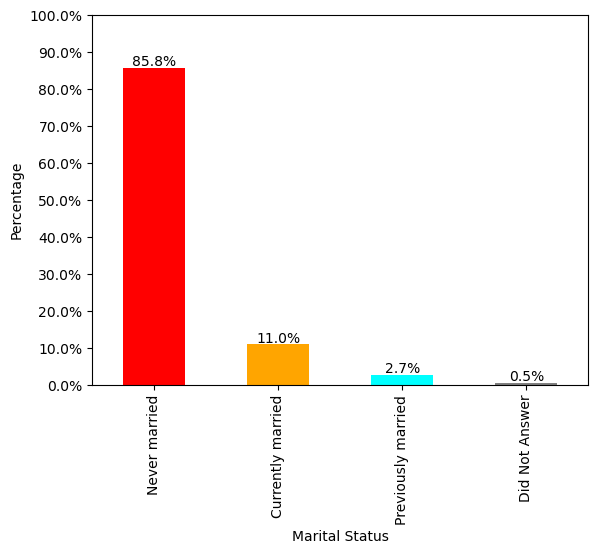

In [186]:
married_dict = {0: 'Did Not Answer', 1: 'Never married', 2: 'Currently married', 3: 'Previously married'}

married_legend = data['married'].replace(married_dict)

married_counts = married_legend.value_counts()

married_percent = married_counts * 100 / married_counts.sum()

ax = married_percent.plot(kind='bar', color=['red','orange','cyan','grey'])
ax.set_xlabel('Marital Status')
ax.set_ylabel('Percentage')
ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in range(0, 101, 10)])
for i, v in enumerate(married_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()


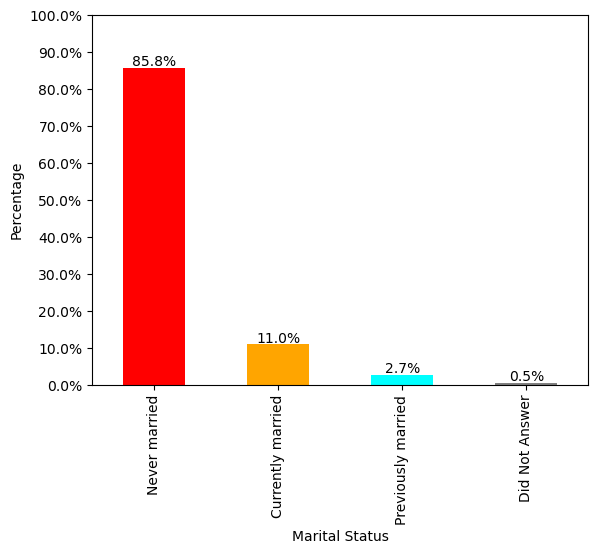

In [209]:
married_dict = {0: 'Did Not Answer', 1: 'Never married', 2: 'Currently married', 3: 'Previously married'}

married_legend = data['married'].replace(married_dict)

married_counts = married_legend.value_counts()

married_percent = married_counts * 100 / married_counts.sum()

ax = married_percent.plot(kind='bar', color=['red','orange','cyan','grey'])
ax.set_xlabel('Marital Status')
ax.set_ylabel('Percentage')
ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in range(0, 101, 10)])
for i, v in enumerate(married_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()


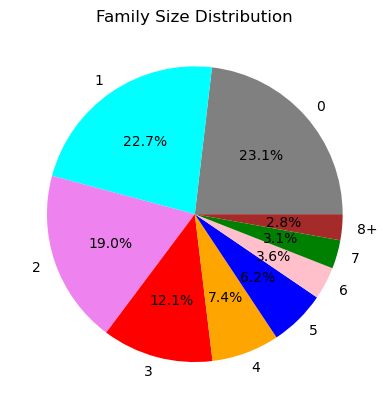

In [297]:
family_size = data['familysize'].dropna()

family_size = family_size.apply(lambda x: '8+' if isinstance(x, int) and x >= 8 else str(x))

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8+']
plt.pie(family_size.value_counts(), labels=labels, autopct='%1.1f%%', colors=['grey', 'cyan', 'violet', 'red', 'orange', 'blue', 'pink', 'green', 'brown'])
plt.title('Family Size Distribution')
plt.show()
